<a href="https://colab.research.google.com/github/aminbaybon/Text-Summarization-using-Luhn-algorithm/blob/main/Luhn_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import re
import nltk
import string
import heapq

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
main_text= 'Mick Jagger (born 26 July 1943) is an English singer and songwriter. He was born and grew up in Dartford, joining the rock band the Rolling Stones in 1962 as the lead vocalist and a founder member. His songwriting partnership with Keith Richards is one of historys most successful. A pioneer of the modern music industry, Jagger has been widely described as one of the most popular and influential frontmen in rock music history. Notorious for his romantic involvements and illicit drug use, he has often been portrayed as a countercultural figure. His performance style has been studied by academics and is the inspiration for the song "Moves like Jagger". He has released four solo albums and starred in two films. With the Stones, he was inducted into the Rock and Roll Hall of Fame in 1989, and into the UK Music Hall of Fame in 2004. As either a Stones member or a solo artist, he has reached No. 1 on the UK and US singles charts thirteen times, and the top 40 seventy times.'

In [ ]:
main_text='Another question sociologists ask is how people live in light of the social transformations of their time. In 1831, Alexis de Tocqueville, a French aristocrat and one of the first great social theorists, visited the United States from France. He wanted to understand how the conditions of democracy and equality were possible. Ever since the publication of his resulting study, Democracy in America (1969; orig. 1835), the United States has been viewed through the lens of sociology as a nation of joiners in which, more so than in Europe, people are involved in many groups and activities. Yet sociologists constantly revisit questions about whether the way we live today is different from how we lived in earlier times, and one of the enduring questions is whether Americans are less involved today in public- spirited activities than in the past.'

In [ ]:
main_text = re.sub(r'\s+' , ' ', main_text)

In [ ]:
main_text

'Mick Jagger (born 26 July 1943) is an English singer and songwriter. He was born and grew up in Dartford, joining the rock band the Rolling Stones in 1962 as the lead vocalist and a founder member. His songwriting partnership with Keith Richards is one of historys most successful. A pioneer of the modern music industry, Jagger has been widely described as one of the most popular and influential frontmen in rock music history. Notorious for his romantic involvements and illicit drug use, he has often been portrayed as a countercultural figure. His performance style has been studied by academics and is the inspiration for the song "Moves like Jagger". He has released four solo albums and starred in two films. With the Stones, he was inducted into the Rock and Roll Hall of Fame in 1989, and into the UK Music Hall of Fame in 2004. As either a Stones member or a solo artist, he has reached No. 1 on the UK and US singles charts thirteen times, and the top 40 seventy times.'

In [19]:
stopwords = nltk.corpus.stopwords.words('english')

In [11]:
def preprocess(text):
    textsample = text.lower()
    lsit_of_tokens= []
    for token in nltk.word_tokenize(textsample):
        if token not in stopwords and token not in string.punctuation:
            lsit_of_tokens.append(token)
    final_text = ' '.join(lsit_of_tokens)
    return final_text

In [ ]:
final_text = preprocess(main_text)

In [ ]:
final_text

"mick jagger born 26 july 1943 english singer songwriter born grew dartford joining rock band rolling stones 1962 lead vocalist founder member songwriting partnership keith richards one historys successful pioneer modern music industry jagger widely described one popular influential frontmen rock music history notorious romantic involvements illicit drug use often portrayed countercultural figure performance style studied academics inspiration song `` moves like jagger '' released four solo albums starred two films stones inducted rock roll hall fame 1989 uk music hall fame 2004. either stones member solo artist reached 1 uk us singles charts thirteen times top 40 seventy times"

In [ ]:
len(final_text)

685

In [ ]:
a = [0,1,2,3,4,5,6]
a[3:]

[3, 4, 5, 6]

In [12]:
def scoresent(text , topword , distance):
    sentindex = []
    wordindex2=[]
    for i in [nltk.word_tokenize(sentence) for sentence in text]:
        wordindex= []
        for words in topword:
            try:
                wordindex.append(i.index(words))
            except ValueError:
                pass
        wordindex.sort()
        wordindex2.append(wordindex)
    reslist = []

    for element in wordindex2:
        elemlist=[0]
        lastitem = 0
        main_list=[]

        #[1,2,5,6] ->
        if len(element)>1:
            for i in range(1,len(element)):
                dis = element[i] - element[lastitem]
                if dis > distance:
                    #elemlist.append(element[lastitem : i])
                    lastitem = i
                    elemlist.append(i)
                else:
                    if i == len(element):
                         elemlist.append(i)
            res = [element[i:j] for i,j in zip(elemlist , elemlist[1:]+[None])]
            reslist.append(res)


        else:
            res =[element]
            reslist.append(res)


    print(reslist)
    score_list=[]
    for i in range(len(reslist)):
        max_score = 0
        for j in range(len(reslist[i])):
            if len(reslist[i][j]) >1:
                dis2 = reslist[i][j][-1] - reslist[i][j][0]
                max_score2 = 1.0 * len(reslist[i][j])**2 / dis2
                if max_score2 > max_score:
                    max_score = max_score2
            elif len(reslist[i][j]) == 1:
                max_score2 = 1.0
                if max_score2 > max_score:
                    max_score = max_score2

        score_list.append((max_score , i))

    return score_list


In [13]:
from nltk.tokenize import sent_tokenize

In [ ]:
mytext = sent_tokenize(main_text)
mytext[0]

'Mick Jagger (born 26 July 1943) is an English singer and songwriter.'

In [5]:
def mostwords(text , number , distance,number_ofsentence):
    sents = [preprocess(sentents) for sentents in nltk.sent_tokenize(text)]
    words = [word for  sentence in sents for word in nltk.word_tokenize(sentence)]
    freq = nltk.FreqDist(words)
    top_n_words = [words[0] for words in freq.most_common(number)]
    score_list = scoresent(sents ,top_n_words ,distance)
    best_sentence = heapq.nlargest(number_ofsentence,score_list)
    final_Sent =[mytext[i] for (score,i) in best_sentence]
    return final_Sent , mytext

In [ ]:
mostwords(main_text , 5 , 5 ,5)

[[[1, 2]], [[0, 4], [7]], [[]], [[2, 4], [11]], [[]], [[9]], [[]], [[0, 2], [8]], [[1]], [[]]]


(['Mick Jagger (born 26 July 1943) is an English singer and songwriter.',
  'With the Stones, he was inducted into the Rock and Roll Hall of Fame in 1989, and into the UK Music Hall of Fame in 2004.',
  'A pioneer of the modern music industry, Jagger has been widely described as one of the most popular and influential frontmen in rock music history.',
  'As either a Stones member or a solo artist, he has reached No.',
  'His performance style has been studied by academics and is the inspiration for the song "Moves like Jagger".'],
 ['Mick Jagger (born 26 July 1943) is an English singer and songwriter.',
  'He was born and grew up in Dartford, joining the rock band the Rolling Stones in 1962 as the lead vocalist and a founder member.',
  'His songwriting partnership with Keith Richards is one of historys most successful.',
  'A pioneer of the modern music industry, Jagger has been widely described as one of the most popular and influential frontmen in rock music history.',
  'Notorious 

In [ ]:
best , sents = mostwords(main_text , 5 , 2 ,3)

[[[1, 2]], [[0], [4], [7]], [[]], [[2, 4], [11]], [[]], [[9]], [[]], [[0, 2], [8]], [[1]], [[]]]


In [14]:
from IPython.core.display import HTML

In [ ]:

text=''
display(HTML(f'<h2>Summary</h>'))
for sentence in sents:
    if sentence in best:
        text += ' ' + sentence.replace(sentence , f"<mark>{sentence}</mark>")
    else:
        text += ' ' + sentence
display(HTML(f"""{text}"""))

In [1]:
!pip install goose3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.7/88.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 7.7 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=89b658af35c2505c6f21584799ab76d9b758f530844b538f585705afb579f810
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [2]:
from goose3 import Goose

In [3]:
g = Goose()
url = 'https://en.wikipedia.org/wiki/Bombing_of_Hamburg_in_World_War_II'
arcticle = g.extract(url).cleaned_text

In [4]:
arcticle

'The Allied bombing of Hamburg during World War II included numerous attacks on civilians and civic infrastructure. As a large city and industrial centre, Hamburg\'s shipyards, U-boat pens, and the Hamburg-Harburg area oil refineries were attacked throughout the war.\n\nAs part of a sustained campaign of strategic bombing during World War II, the attack during the last week of July 1943, code named Operation Gomorrah, created one of the largest firestorms raised by the Royal Air Force and United States Army Air Forces in World War II, killing an estimated 37,000 people in Hamburg[3] (and wounding 180,000 more),[citation needed] and destroying 60% of the city\'s houses.[3]\n\nHamburg was selected as a target because it was considered particularly susceptible to attack with incendiaries, which, from the experience of the Blitz, were felt to inflict more damage than just high explosive bombs. Hamburg also contained a high number of targets supporting the German war effort and was relative

In [16]:
mytext = sent_tokenize(arcticle)
mytext[0]
len(mytext)

174

In [22]:
best , sents = mostwords(arcticle , 300 , 10 ,50)

[[[0, 1, 2, 3, 4, 5, 6, 8, 9]], [[0, 1, 2, 3, 4, 5, 10], [11, 13, 15]], [[0, 2, 3, 4, 5, 6, 7, 8, 9, 10], [11, 12, 13, 14, 15, 16, 17, 18, 19], [23, 24, 25, 26, 29, 33], [34, 35, 36, 37, 38, 42], [45, 46, 47]], [[0, 1, 3, 4, 7, 8, 9, 10], [12, 13, 14, 15, 16]], [[0, 1, 3, 4, 5, 7, 8, 9, 10], [11, 12, 13]], [[0, 1, 4, 5, 8, 9], [11]], [[0, 1, 2, 4, 6]], [[0, 1, 2, 3, 4, 6, 10], [11, 14, 20, 21], [24, 26]], [[1, 2, 6, 7, 8, 9, 10, 11], [16]], [[0, 1, 2, 3, 4, 7, 8, 9, 10], [11, 16, 17, 18, 19, 20], [24, 26, 27]], [[0, 2, 3, 4, 5, 6, 7]], [[0, 1, 3, 4, 6, 7, 9, 10], [13, 14, 17]], [[0, 3, 4, 5, 6, 7, 8, 9, 10], [11, 12, 13]], [[1, 2, 3]], [[0, 1, 5, 6, 7, 8, 10], [14, 16, 17]], [[1, 4, 6, 7, 8, 9]], [[0, 3, 5, 6, 8], [12, 14, 15, 16, 17, 20, 21], [23, 24, 25, 27]], [[1, 4, 6, 8, 9, 10, 11], [12, 14, 15, 16]], [[1, 2, 3, 6, 9, 11], [12, 14, 15, 16, 17, 18]], [[2, 3, 4, 6, 7, 8]], [[0, 1, 2, 3, 4, 5, 7]], [[0, 1, 2, 3, 4]], [[3, 4, 7, 8, 9, 10]], [[0, 1, 2, 4, 5, 6, 9, 10], [12]], [[2, 3, 5

In [23]:

text=''
display(HTML(f'<h2>Summary</h>'))
for sentence in sents:
    if sentence in best:
        text += ' ' + sentence.replace(sentence , f"<mark>{sentence}</mark>")
    else:
        text += ' ' + sentence
display(HTML(f"""{text}"""))

In [30]:
!pip install wordcloud

In [35]:
import  wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [36]:
final_text = preprocess(arcticle)

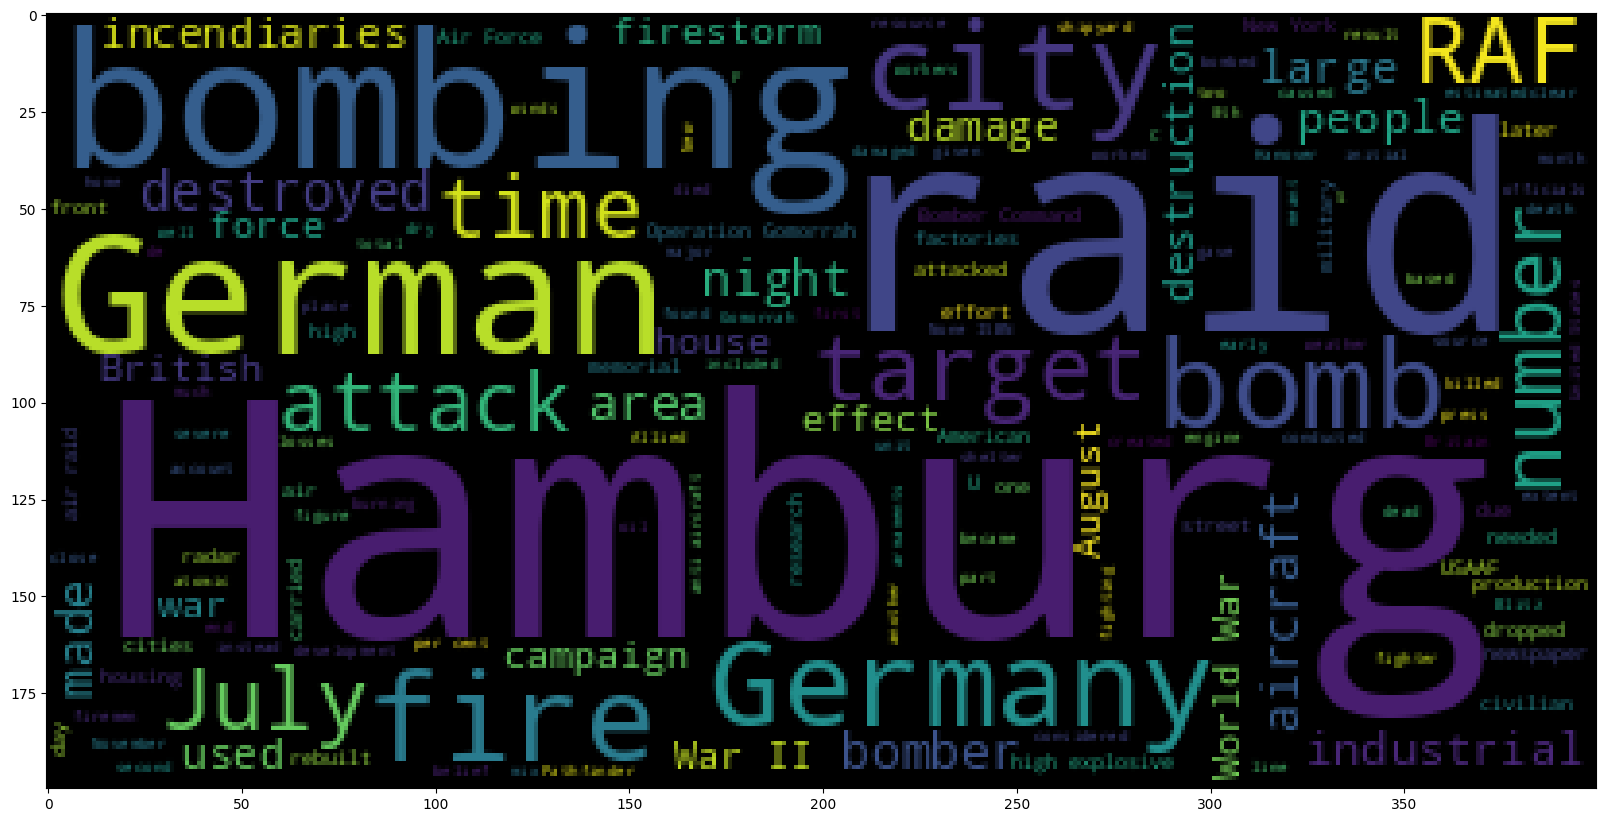

In [41]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(arcticle))

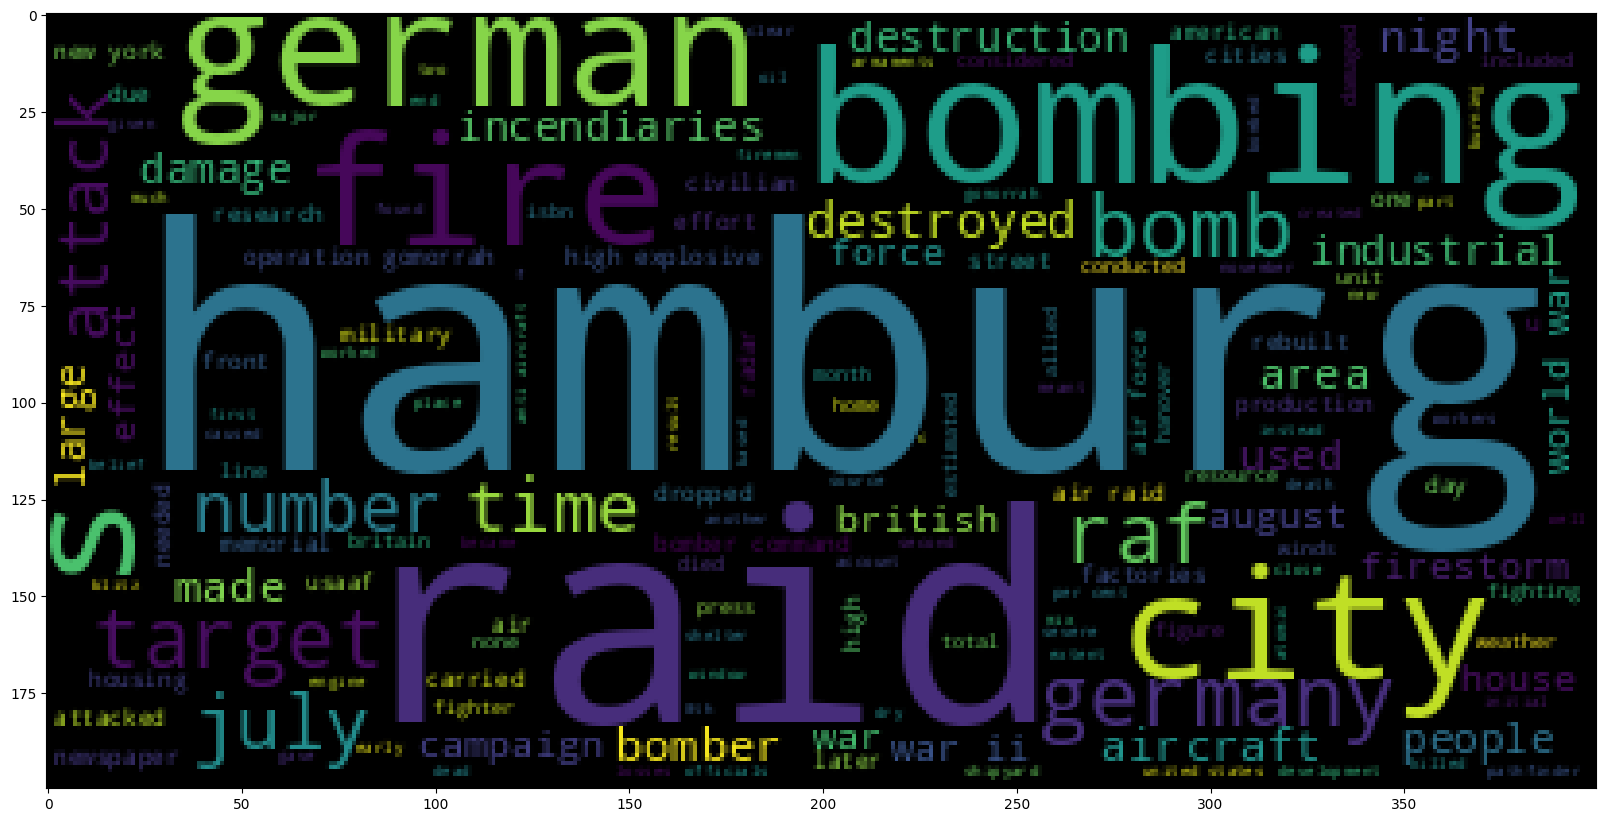

In [42]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(final_text))

In [50]:
pip install spacy

In [57]:
import spacy
from spacy import displacy

In [54]:
nlp = spacy.load('en_core_web_sm')

In [55]:
nlp

In [62]:
document1 = nlp(arcticle)
document2 = nlp(final_text)


In [63]:
displacy.render(document1, style='ent', jupyter = True)

In [64]:
displacy.render(document2, style='ent', jupyter = True)